In [15]:
# ============================================
# EARLY STAGE DIABETES RISK — EDA NOTEBOOK
# ============================================

# PURPOSE:
# Understand the PAST: structure, quality, patterns, and group risks.
# This prepares us to build a reliable predictive model later.

CSV_PATH = "C:/repose/bedste-gruppe-ml/data/raw_data/mushroom_raw_data.csv"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# Ignore warnings
w.filterwarnings("ignore", category=FutureWarning, module="seaborn")
pd.set_option('future.no_silent_downcasting', True)

print("Libraries loaded.")


Libraries loaded.


In [16]:
# 1) LOAD DATA
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
df.head()


Shape: (8416, 23)


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [17]:
# 2) BASIC STRUCTURE
display(df.info())
display(df.describe(include="all").T.head(20))

print("""
WHAT WE'RE LOOKING FOR:
- Column data types
- Text categories vs numeric fields
- Any strange/unexpected values
""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises                   8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                5936 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

None

,count,unique,top,freq
poisonous,8416,2,EDIBLE,4488
cap-shape,8416,6,CONVEX,3796
cap-surface,8416,4,SCALY,3268
cap-color,8416,10,BROWN,2320
bruises,8416,2,NO,5040
odor,8416,9,NONE,3808
gill-attachment,8416,2,FREE,8200
gill-spacing,8416,2,CLOSE,6824
gill-size,8416,2,BROAD,5880
gill-color,8416,12,BUFF,1728



WHAT WE'RE LOOKING FOR:
- Column data types
- Text categories vs numeric fields
- Any strange/unexpected values



stalk-root                  2480
stalk-surface-above-ring       0
population                     0
spore-print-color              0
ring-type                      0
ring-number                    0
veil-color                     0
veil-type                      0
stalk-color-below-ring         0
stalk-color-above-ring         0
stalk-surface-below-ring       0
poisonous                      0
cap-shape                      0
stalk-shape                    0
gill-color                     0
gill-size                      0
gill-spacing                   0
gill-attachment                0
odor                           0
bruises                        0
cap-color                      0
cap-surface                    0
habitat                        0
dtype: int64

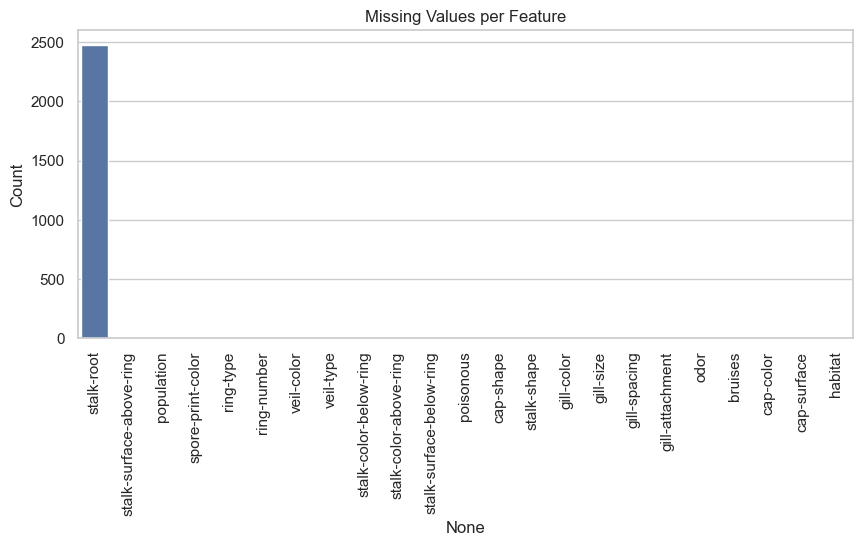

Insight: Most public versions of this dataset have no missing values. Always verify.


In [18]:
# 3) MISSING VALUES — TABLE + BARPLOT
missing = df.isna().sum().sort_values(ascending=False)
display(missing)

plt.figure(figsize=(10,4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.show()

print("Insight: Most public versions of this dataset have no missing values. Always verify.")


In [19]:
# 4) SAFE NUMERIC VIEW FOR ANALYSIS (map common text to numeric)
df_num = df.copy()

text_map = {
    "EDIBLE": 0, "POISONOUS": 1,
    "BRUISES": 1, "NO": 0,
    "BROAD": 0, "NARROW": 1,
    "ENLARGING": 0, "TAPERING": 1,
    "FREE": 0, "ATTACHED": 1,
    "CROWDED": 1, "CLOSE": 0,
    "NONE": 0, "ONE": 1, "TWO": 2,
}

# apply mapping
df_num = df_num.replace(text_map)

# drop veil-type if present (it's constant in your data)
df_num.drop(columns=["veil-type"], errors="ignore", inplace=True)

# Identify which columns are still categorical
categorical_cols = [
    c for c in df_num.columns
    if df_num[c].dtype == "object"
]

# One-hot encode those columns
df_num = pd.get_dummies(df_num, columns=categorical_cols, drop_first=False, dtype=int)

df_num.head()


,poisonous_0,poisonous_1,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,cap-color_BROWN,cap-color_BUFF,cap-color_CINNAMON,cap-color_GRAY,cap-color_GREEN,cap-color_PINK,cap-color_PURPLE,cap-color_RED,cap-color_WHITE,cap-color_YELLOW,bruises_0,bruises_1,odor_0,odor_ALMOND,odor_ANISE,odor_CREOSOTE,odor_FISHY,odor_FOUL,odor_MUSTY,odor_PUNGENT,odor_SPICY,gill-attachment_0,gill-attachment_1,gill-spacing_0,gill-spacing_1,gill-size_0,gill-size_1,gill-color_BLACK,gill-color_BROWN,gill-color_BUFF,gill-color_CHOCOLATE,gill-color_GRAY,gill-color_GREEN,gill-color_ORANGE,gill-color_PINK,gill-color_PURPLE,gill-color_RED,gill-color_WHITE,gill-color_YELLOW,stalk-shape_0,stalk-shape_1,stalk-root_BULBOUS,stalk-root_CLUB,stalk-root_EQUAL,stalk-root_ROOTED,stalk-surface-above-ring_FIBROUS,stalk-surface-above-ring_SCALY,stalk-surface-above-ring_SILKY,stalk-surface-above-ring_SMOOTH,stalk-surface-below-ring_FIBROUS,stalk-surface-below-ring_SCALY,stalk-surface-below-ring_SILKY,stalk-surface-below-ring_SMOOTH,stalk-color-above-ring_BROWN,stalk-color-above-ring_BUFF,stalk-color-above-ring_CINNAMON,stalk-color-above-ring_GRAY,stalk-color-above-ring_ORANGE,stalk-color-above-ring_PINK,stalk-color-above-ring_RED,stalk-color-above-ring_WHITE,stalk-color-above-ring_YELLOW,stalk-color-below-ring_BROWN,stalk-color-below-ring_BUFF,stalk-color-below-ring_CINNAMON,stalk-color-below-ring_GRAY,stalk-color-below-ring_ORANGE,stalk-color-below-ring_PINK,stalk-color-below-ring_RED,stalk-color-below-ring_WHITE,stalk-color-below-ring_YELLOW,veil-color_BROWN,veil-color_ORANGE,veil-color_WHITE,veil-color_YELLOW,ring-number_0,ring-number_1,ring-number_2,ring-type_0,ring-type_EVANESCENT,ring-type_FLARING,ring-type_LARGE,ring-type_PENDANT,spore-print-color_BLACK,spore-print-color_BROWN,spore-print-color_BUFF,spore-print-color_CHOCOLATE,spore-print-color_GREEN,spore-print-color_ORANGE,spore-print-color_PURPLE,spore-print-color_WHITE,spore-print-color_YELLOW,population_ABUNDANT,population_CLUSTERED,population_NUMEROUS,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


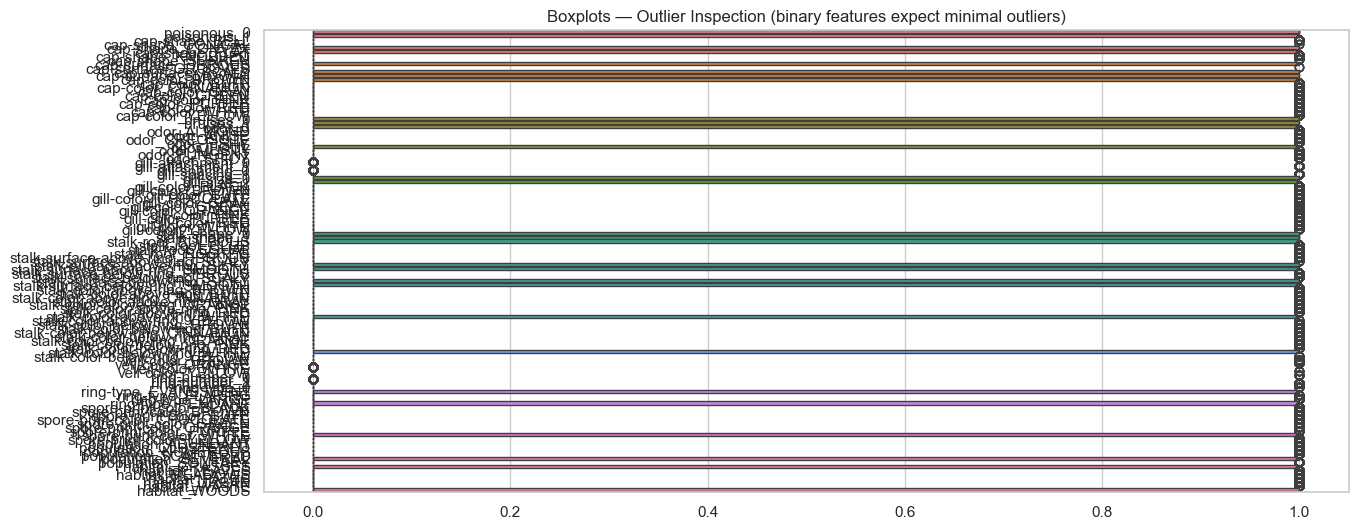

Insight: Binary features (0/1) don't exhibit classical outliers. Method shown for completeness.


In [20]:
# 5) OUTLIERS — BOXPLOTS (most features are binary; outliers minimal)
# Drop target for the boxplot; keep only numeric columns
numeric_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()
num_for_box = [c for c in numeric_cols if c != "class"]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_num[num_for_box], orient="h")
plt.title("Boxplots — Outlier Inspection (binary features expect minimal outliers)")
plt.show()

print("Insight: Binary features (0/1) don't exhibit classical outliers. Method shown for completeness.")


In [23]:
# 6) TARGET DISTRIBUTION (Who had diabetes in the past?)
if "class" in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="class", data=df, palette="Set2")
    plt.title("Target Distribution (Past Cases)")
    plt.show()

    print("Insight: Many versions of this dataset are fairly balanced, which simplifies modeling.")
else:
    print("'class' column not found. Please verify your dataset.")


'class' column not found. Please verify your dataset.


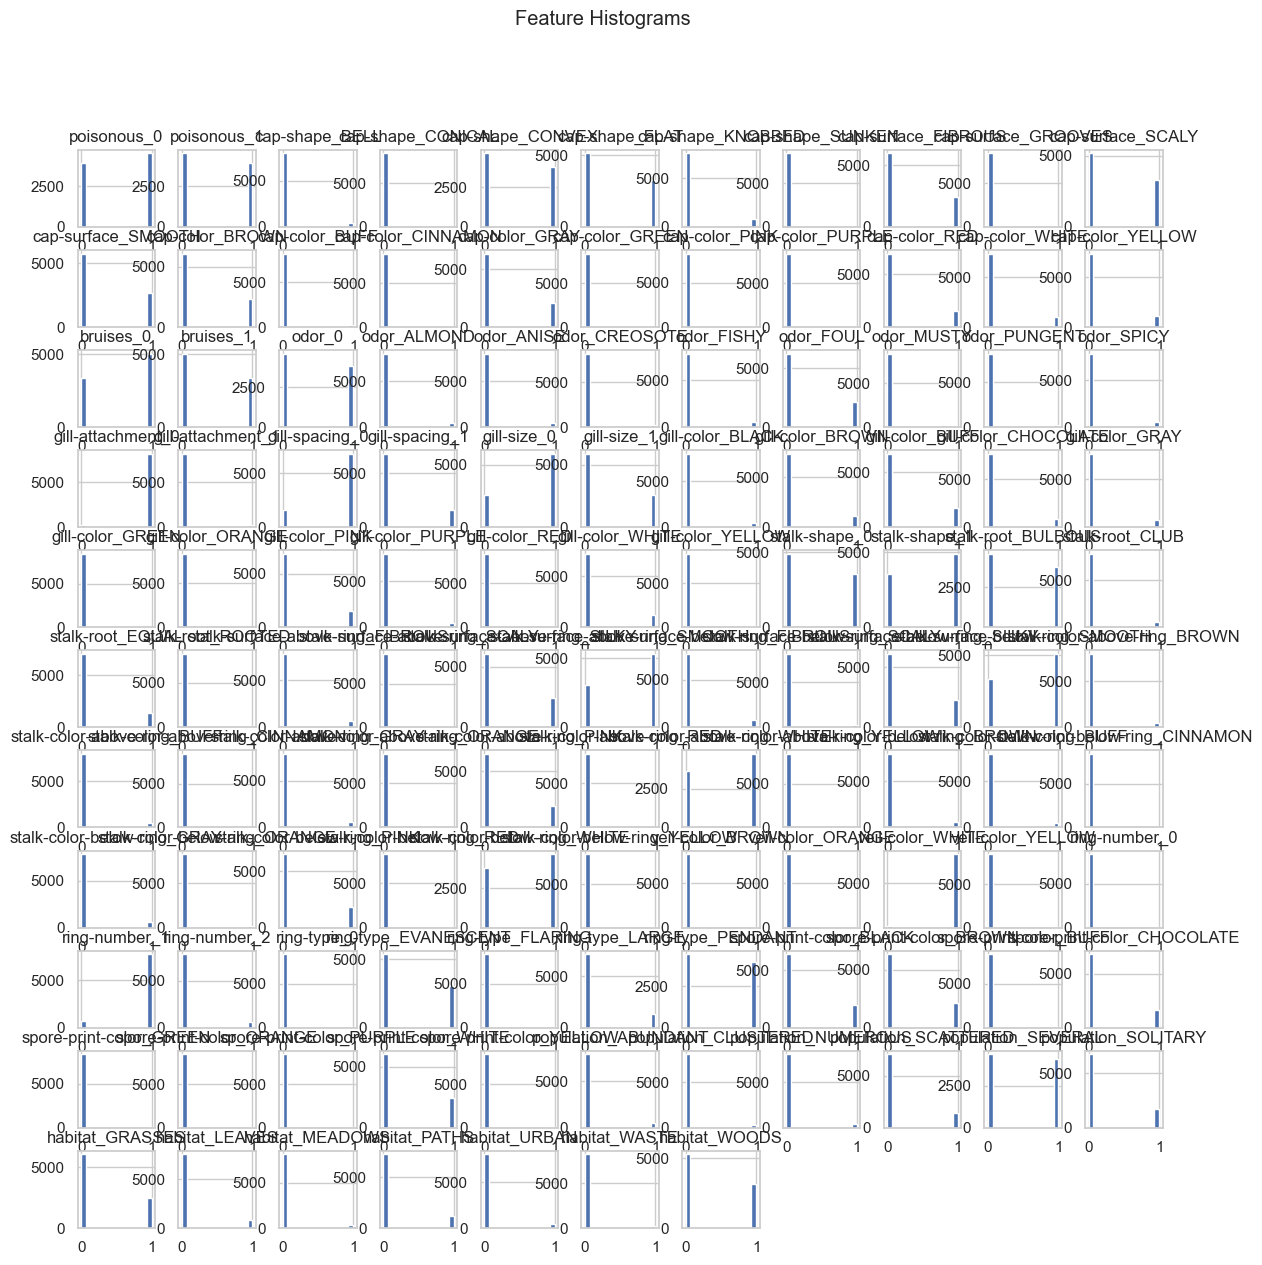

Insight: Most symptom features are binary; continuous fields (e.g., Age) show their spread.


In [24]:
# 7) HISTOGRAMS — DISTRIBUTIONS
df_num.hist(figsize=(14,14), bins=15)
plt.suptitle("Feature Histograms")
plt.show()

print("Insight: Most symptom features are binary; continuous fields (e.g., Age) show their spread.")


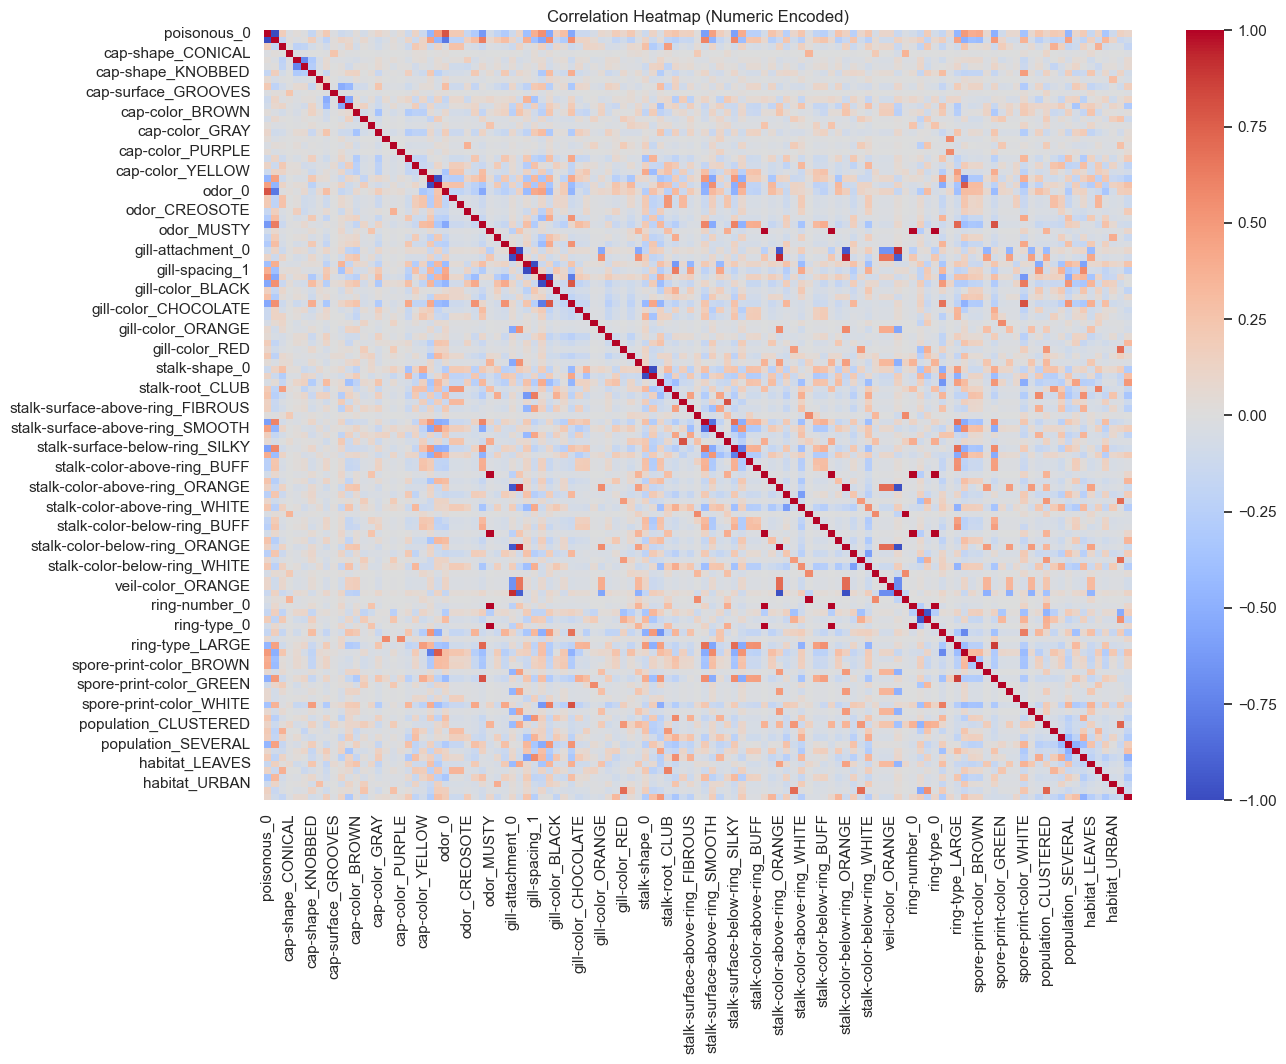

Insight: Clusters of related symptoms may appear; target ('class') relations guide feature importance.


In [25]:
# 8) CORRELATION HEATMAP — OVERALL PATTERNS
plt.figure(figsize=(14,10))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Encoded)")
plt.show()

print("Insight: Clusters of related symptoms may appear; target ('class') relations guide feature importance.")


In [26]:
# 9) RISK BY GENDER (Past)
if "Gender" in df.columns and "class" in df_num.columns:
    plt.figure(figsize=(6,5))
    # compute mean of class (probability) grouped by Gender
    risk_by_gender = df_num.groupby("Gender")["class"].mean().rename({0:"Female",1:"Male"})
    sns.barplot(x=risk_by_gender.index, y=risk_by_gender.values)
    plt.title("Diabetes Risk by Gender (Past Data)")
    plt.ylabel("Probability of Diabetes")
    plt.xlabel("Gender (0=Female, 1=Male)")
    plt.show()

    display(risk_by_gender)
    print("Interpretation: Higher bar => higher historical prevalence in that group.")
else:
    print("Skipping gender risk plot (missing 'Gender' or 'class').")


Skipping gender risk plot (missing 'Gender' or 'class').


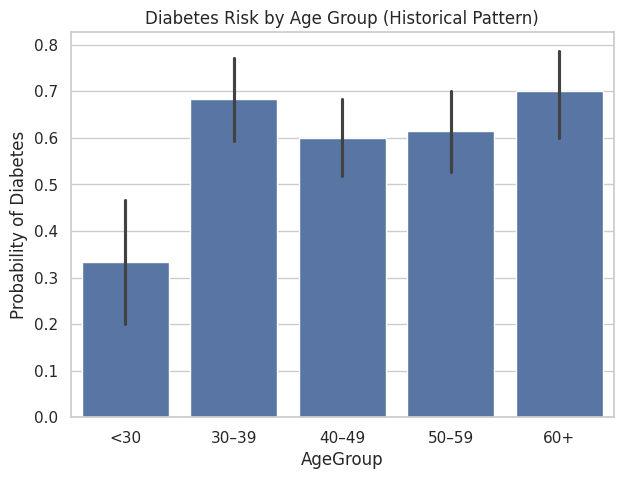

Interpretation: Risk typically rises with age; confirm with your plot.


In [12]:
# 10) RISK BY AGE GROUP (Past)
if "Age" in df_num.columns and "class" in df_num.columns:
    df_age = df_num.copy()
    # Age groups (robust even if some NaNs present)
    df_age["AgeGroup"] = pd.cut(
        df_age["Age"],
        bins=[0,30,40,50,60,200],
        labels=["<30","30–39","40–49","50–59","60+"]
    )
    plt.figure(figsize=(7,5))
    sns.barplot(x="AgeGroup", y="class", data=df_age, estimator=np.mean)
    plt.title("Diabetes Risk by Age Group (Historical Pattern)")
    plt.ylabel("Probability of Diabetes")
    plt.show()

    print("Interpretation: Risk typically rises with age; confirm with your plot.")
else:
    print("Skipping age-group risk (missing 'Age' or 'class').")


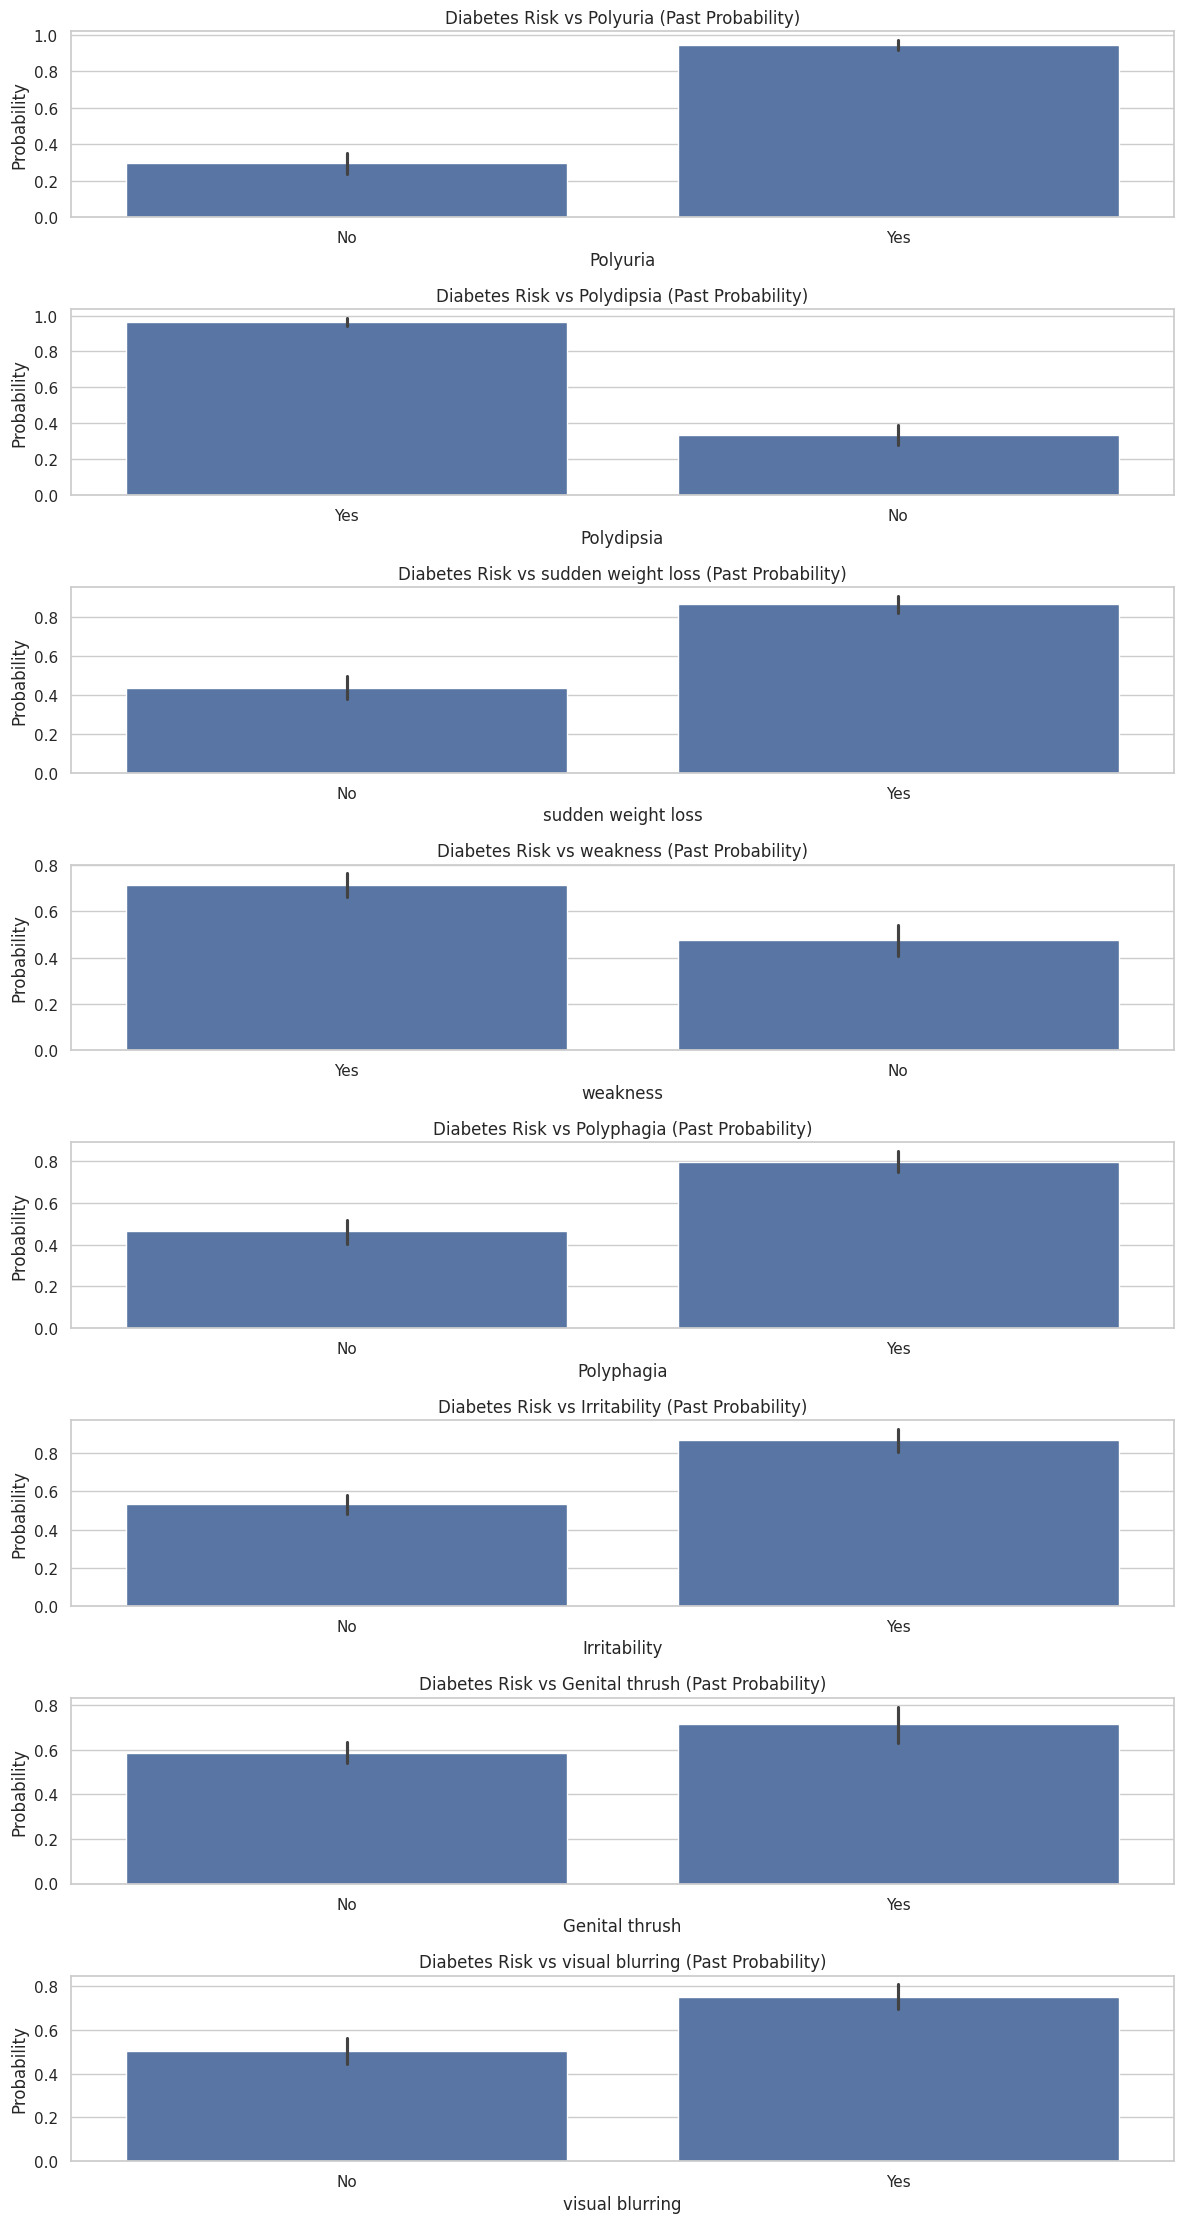

Interpretation: These plots show how much each symptom was associated with diabetes historically.


In [13]:
# 11) RISK BY KEY SYMPTOMS (Past) — choose top common symptom names if present
candidate_symptoms = [
    "Polyuria", "Polydipsia", "sudden weight loss",
    "weakness", "Polyphagia", "Irritability", "Genital thrush",
    "visual blurring", "Itching", "delayed healing",
    "partial paresis", "muscle stiffness", "Alopecia", "Obesity"
]
symptoms = [c for c in candidate_symptoms if c in df.columns]

if symptoms and "class" in df_num.columns:
    n = min(len(symptoms), 8)
    plt.figure(figsize=(12, 2.8*n))
    for i, col in enumerate(symptoms[:n]):
        plt.subplot(n, 1, i+1)
        sns.barplot(x=df[col], y=df_num["class"])
        plt.title(f"Diabetes Risk vs {col} (Past Probability)")
        plt.ylabel("Probability")
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    print("Interpretation: These plots show how much each symptom was associated with diabetes historically.")
else:
    print("No common symptom columns found from the list; adjust names to your dataset.")


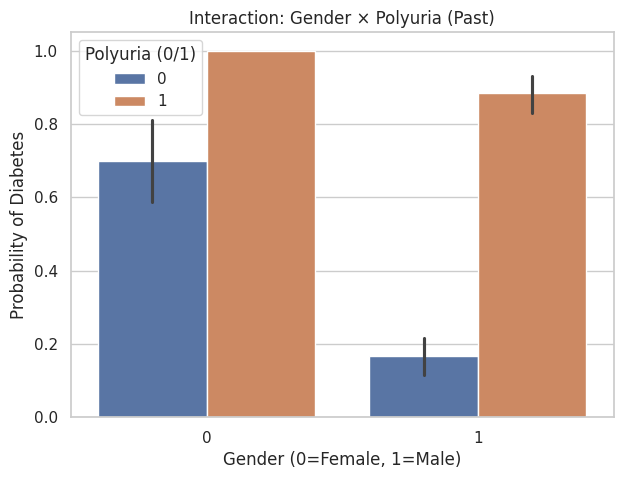

Interpretation: Interactions reveal differences between groups conditioned on a symptom.


In [14]:
# 12) INTERACTION: GENDER × POLYURIA (if present)
if "Gender" in df.columns and "Polyuria" in df.columns and "class" in df_num.columns:
    tmp = df_num.copy()
    plt.figure(figsize=(7,5))
    sns.barplot(x="Gender", y="class", hue="Polyuria", data=tmp, estimator=np.mean)
    plt.title("Interaction: Gender × Polyuria (Past)")
    plt.ylabel("Probability of Diabetes")
    plt.xlabel("Gender (0=Female, 1=Male)")
    plt.legend(title="Polyuria (0/1)")
    plt.show()

    print("Interpretation: Interactions reveal differences between groups conditioned on a symptom.")
else:
    print("Skipping Interaction plot (need 'Gender', 'Polyuria', and 'class').")


In [29]:
# 13) HEATMAP: MEAN FEATURE VALUES BY OUTCOME (0=No, 1=Yes)
if "class" in df_num.columns:
    means_by_class = df_num.groupby("class").mean().T.sort_values(1, ascending=False)
    plt.figure(figsize=(8, max(6, 0.4*len(means_by_class))))
    sns.heatmap(means_by_class, annot=True, cmap="coolwarm")
    plt.title("Feature Means by Outcome (Past Patients)")
    plt.show()

    print("""
Interpretation:
- Rows with higher values in class=1 column are more prevalent among diabetic cases.
- Great for spotting which symptoms differ most between classes.
""")
else:
    print("Skipping means-by-class heatmap (missing 'class').")


Skipping means-by-class heatmap (missing 'class').


In [31]:
# 14) NORMALIZATION — WHEN & WHY
print("""
Normalization Discussion
------------------------
• This dataset is largely binary (0/1). Normalization is NOT required for tree-based models.
• If you choose Logistic Regression, SVM, KNN, or Neural Networks, scale numeric inputs.
• We'll show scaling in the modeling notebook (optional for trees).
""")



Normalization Discussion
------------------------
• This dataset is largely binary (0/1). Normalization is NOT required for tree-based models.
• If you choose Logistic Regression, SVM, KNN, or Neural Networks, scale numeric inputs.
• We'll show scaling in the modeling notebook (optional for trees).



In [32]:
# 15) EDA SUMMARY — WHAT THE VISUALS TELL US ABOUT THE PAST
print("""
EDA TAKEAWAYS (PAST DATA)
-------------------------
• Data quality: Missing values minimal/none; types are mostly categorical/binary.
• Group risk: Gender and AgeGroup plots reveal which groups had higher historical prevalence.
• Symptom risk: Polyuria, Polydipsia, and Sudden weight loss often show strong association.
• Interactions: Gender × Polyuria (and others) can differ — good to consider for modeling.
• Heatmaps: Clear separation of symptom patterns between class 0 and class 1.

Decision for Modeling:
• Keep key symptoms as features.
• Consider Age (grouped or continuous).
• Use a robust classifier (Random Forest / Logistic Regression).
• Scale only if using models that benefit from it.
""")



EDA TAKEAWAYS (PAST DATA)
-------------------------
• Data quality: Missing values minimal/none; types are mostly categorical/binary.
• Group risk: Gender and AgeGroup plots reveal which groups had higher historical prevalence.
• Symptom risk: Polyuria, Polydipsia, and Sudden weight loss often show strong association.
• Interactions: Gender × Polyuria (and others) can differ — good to consider for modeling.
• Heatmaps: Clear separation of symptom patterns between class 0 and class 1.

Decision for Modeling:
• Keep key symptoms as features.
• Consider Age (grouped or continuous).
• Use a robust classifier (Random Forest / Logistic Regression).
• Scale only if using models that benefit from it.

